In [170]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#reading dataset in
houses = pd.read_csv('/kaggle/input/new-york-housing-market/NY-House-Dataset.csv')
houses.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [171]:
print(list(houses.columns))
print(houses.shape)

['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE']
(4801, 17)


In [172]:
#removing irrelevant data
drop_columns = ['BROKERTITLE', 'ADDRESS', 'MAIN_ADDRESS', 'STATE', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'FORMATTED_ADDRESS', 'STREET_NAME', 'LONG_NAME', 'LATITUDE', 'LONGITUDE']

houses = houses.drop(labels = drop_columns, axis = 1)
houses.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY
0,Condo for sale,315000,2,2.000000,1400.0,Manhattan
1,Condo for sale,195000000,7,10.000000,17545.0,New York County
2,House for sale,260000,4,2.000000,2015.0,Richmond County
3,Condo for sale,69000,3,1.000000,445.0,New York County
4,Townhouse for sale,55000000,7,2.373861,14175.0,New York County


In [173]:
#sorting by type of house
houses = houses.sort_values(by = 'TYPE')
houses.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY
2400,Co-op for sale,625000,1,1.0,650.000000,New York
2479,Co-op for sale,995000,3,2.0,1300.000000,New York
2481,Co-op for sale,345000,2,1.0,1000.000000,Kings County
2483,Co-op for sale,945000,2,1.0,2184.207862,New York
2485,Co-op for sale,500000,3,2.0,1200.000000,Queens County


In [174]:
print(houses['TYPE'].unique())

['Co-op for sale' 'Coming Soon' 'Condo for sale' 'Condop for sale'
 'Contingent' 'For sale' 'Foreclosure' 'House for sale' 'Land for sale'
 'Mobile house for sale' 'Multi-family home for sale' 'Pending'
 'Townhouse for sale']


I only want to look at houses. I'm going to remove anything that's not a condo,  house, mobile house, townhouse, or multi-family home.

In [175]:
#removing irrelevant data
drop_rows = ['Co-op for sale', 'Coming Soon', 'Condop for sale', 'Contingent', 'For sale', 'LOCALITY', 'Foreclosure', 'Land for sale', 'Pending']
houses = houses[~houses['TYPE'].isin(drop_rows)]
houses.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY
2607,Condo for sale,395000,1,1.0,519.000000,Queens County
2259,Condo for sale,1150000,2,2.0,2184.207862,New York
3178,Condo for sale,1385000,1,2.0,875.000000,New York
2257,Condo for sale,1200000,2,2.0,1200.000000,New York
753,Condo for sale,629000,3,2.0,1360.000000,Brooklyn


In [176]:
print(houses['TYPE'].unique())

['Condo for sale' 'House for sale' 'Mobile house for sale'
 'Multi-family home for sale' 'Townhouse for sale']


Preparing linear regression models and visualization libraries

In [177]:
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Condos

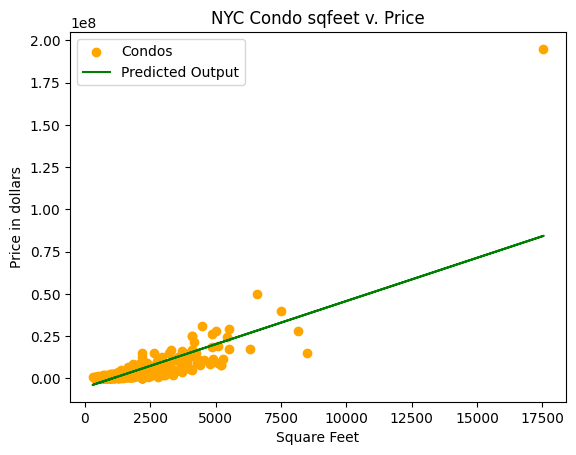

In [178]:
condos = houses[houses['TYPE'] == 'Condo for sale']

x = condos[['PROPERTYSQFT']].values
y = condos['PRICE'].values

model = LinearRegression()
model.fit(x, y)

predictions = model.predict(x)

plt.scatter(x, y, color = 'orange', label = 'Condos')
plt.plot(x, predictions, color = 'green', label = 'Predicted Output')
plt.xlabel('Square Feet')
plt.ylabel('Price in dollars')
plt.title('NYC Condo sqfeet v. Price')
plt.legend()
plt.show()

# Houses

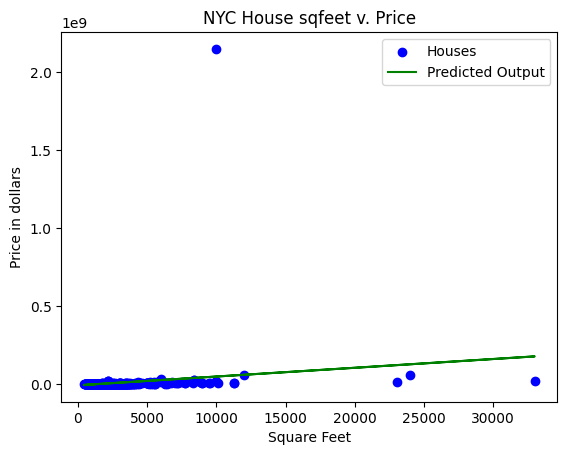

In [179]:
house_s = houses[houses['TYPE'] == 'House for sale']

x = house_s[['PROPERTYSQFT']].values
y = house_s['PRICE'].values

model = LinearRegression()
model.fit(x, y)

predictions = model.predict(x)

plt.scatter(x, y, color = 'blue', label = 'Houses')
plt.plot(x, predictions, color = 'green', label = 'Predicted Output')
plt.xlabel('Square Feet')
plt.ylabel('Price in dollars')
plt.title('NYC House sqfeet v. Price')
plt.legend()
plt.show()

# Mobile houses

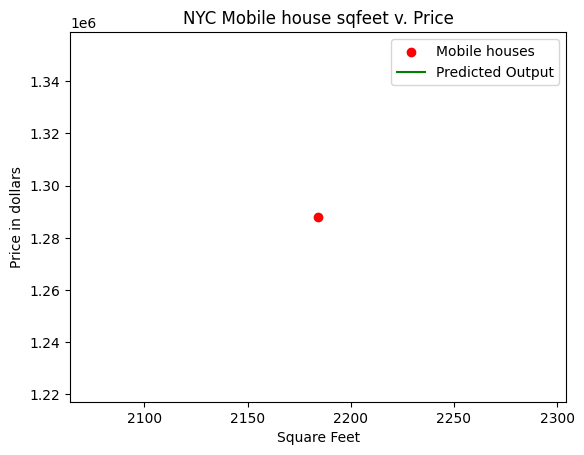

In [180]:
mobhouses = houses[houses['TYPE'] == 'Mobile house for sale']

x = mobhouses[['PROPERTYSQFT']].values
y = mobhouses['PRICE'].values

model = LinearRegression()
model.fit(x, y)

predictions = model.predict(x)

plt.scatter(x, y, color = 'red', label = 'Mobile houses')
plt.plot(x, predictions, color = 'green', label = 'Predicted Output')
plt.xlabel('Square Feet')
plt.ylabel('Price in dollars')
plt.title('NYC Mobile house sqfeet v. Price')
plt.legend()
plt.show()

# Multi-family houses

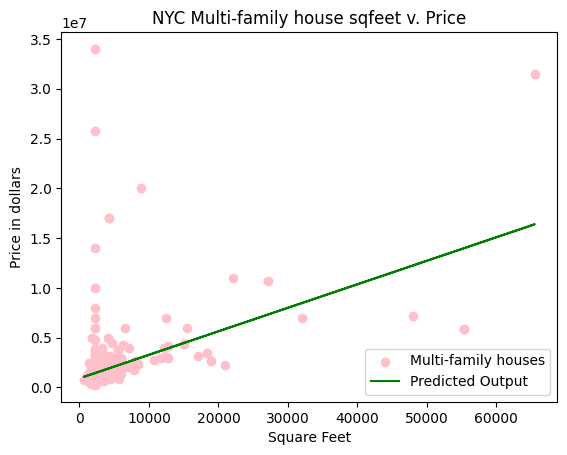

In [181]:
mfamhouses = houses[houses['TYPE'] == 'Multi-family home for sale']

x = mfamhouses[['PROPERTYSQFT']].values
y = mfamhouses['PRICE'].values

model = LinearRegression()
model.fit(x, y)

predictions = model.predict(x)

plt.scatter(x, y, color = 'pink', label = 'Multi-family houses')
plt.plot(x, predictions, color = 'green', label = 'Predicted Output')
plt.xlabel('Square Feet')
plt.ylabel('Price in dollars')
plt.title('NYC Multi-family house sqfeet v. Price')
plt.legend()
plt.show()

# Townhouses

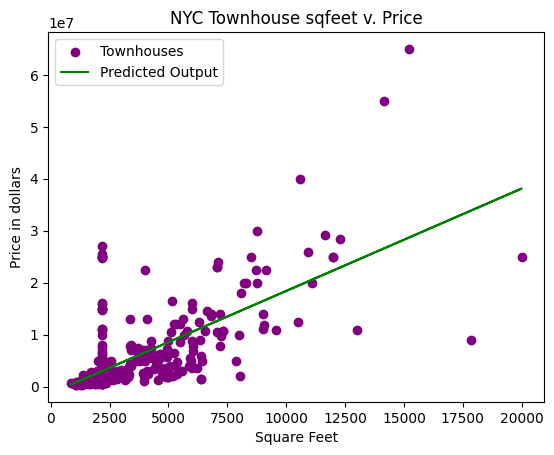

In [182]:
townhouses = houses[houses['TYPE'] == 'Townhouse for sale']

x = townhouses[['PROPERTYSQFT']].values
y = townhouses['PRICE'].values

model = LinearRegression()
model.fit(x, y)

predictions = model.predict(x)

plt.scatter(x, y, color = 'purple', label = 'Townhouses')
plt.plot(x, predictions, color = 'green', label = 'Predicted Output')
plt.xlabel('Square Feet')
plt.ylabel('Price in dollars')
plt.title('NYC Townhouse sqfeet v. Price')
plt.legend()
plt.show()